In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
from IPython.core.debugger import set_trace
from scipy.stats import iqr

In [2]:
file='/Users/oz/downloads/nh_all.json'

In [3]:
with open(file) as f:
    data = json.load(f)

In [4]:
data.keys()

dict_keys(['deployment_meta', 'obs_vals', 'time_vals', 'normalized_time_vals'])

In [5]:
meta=data['deployment_meta']

In [6]:
meta.keys()

dict_keys(['deployment_id', 'params', 'displaynames', 'units', 'min', 'max', 'computed_params', 'lat', 'lon', 'locations', 'startdate', 'endDate', 'startdate_epoch', 'endDate_epoch', 'deploy_startdates', 'deploy_enddates', 'deploy_startdates_epoch', 'deploy_enddates_epoch', 'deploy_startdates_normalized', 'deploy_enddates_normalized', 'deploy_processed_flags', 'URL_Data', 'URL_Metadata'])

In [7]:
d2 = [str(k)+"x" for k in meta.values()]

In [8]:
d2

['nhx',
 "['systemnum', 'xco2seadryair', 'xco2airdryair', 'o2percent', 'logicbat', 'xbat', 'zerocoef', 'spancoef', 'spanflag', 'zeroflag', 'sst', 'stdsst', 'conduct', 'stdcond', 'sal', 'stdsal', 'ph', 'phtemp', 'phbatt', 'licortemp_zpon', 'licorpres_zpon', 'stdlicortemp_zpon', 'stdlicorpres_zpon', 'xco2_zpon', 'stdxco2_zpon', 'o2_zpon', 'stdo2_zpon', 'rh_zpon', 'stdrh_zpon', 'temp_zpon', 'stdtemp_zpon', 'licortemp_zpoff', 'licorpres_zpoff', 'stdlicortemp_zpoff', 'stdlicorpres_zpoff', 'xco2_zpoff', 'stdxco2_zpoff', 'o2_zpoff', 'stdo2_zpoff', 'rh_zpoff', 'stdrh_zpoff', 'temp_zpoff', 'stdtemp_zpoff', 'licortemp_zpcal', 'licorpres_zpcal', 'stdlicortemp_zpcal', 'stdlicorpres_zpcal', 'xco2_zpcal', 'stdxco2_zpcal', 'o2_zpcal', 'stdo2_zpcal', 'rh_zpcal', 'stdrh_zpcal', 'temp_zpcal', 'stdtemp_zpcal', 'licortemp_spon', 'licorpres_spon', 'stdlicortemp_spon', 'stdlicorpres_spon', 'xco2_spon', 'stdxco2_spon', 'o2_spon', 'stdo2_spon', 'rh_spon', 'stdrh_spon', 'temp_spon', 'stdtemp_spon', 'licortemp_

In [9]:
params = meta['params']
times = data['time_vals']

In [10]:
paramsArray = np.array(params)
sstindex = np.where(paramsArray == 'sst')[0][0]  #makes a temporary array from params dictionary
sssindex = np.where(paramsArray == 'sal')[0][0]
o2index = np.where(paramsArray == 'sc_o2_umolkg')[0][0]

In [11]:
sssindex

14

In [12]:
print(params)
times

['systemnum', 'xco2seadryair', 'xco2airdryair', 'o2percent', 'logicbat', 'xbat', 'zerocoef', 'spancoef', 'spanflag', 'zeroflag', 'sst', 'stdsst', 'conduct', 'stdcond', 'sal', 'stdsal', 'ph', 'phtemp', 'phbatt', 'licortemp_zpon', 'licorpres_zpon', 'stdlicortemp_zpon', 'stdlicorpres_zpon', 'xco2_zpon', 'stdxco2_zpon', 'o2_zpon', 'stdo2_zpon', 'rh_zpon', 'stdrh_zpon', 'temp_zpon', 'stdtemp_zpon', 'licortemp_zpoff', 'licorpres_zpoff', 'stdlicortemp_zpoff', 'stdlicorpres_zpoff', 'xco2_zpoff', 'stdxco2_zpoff', 'o2_zpoff', 'stdo2_zpoff', 'rh_zpoff', 'stdrh_zpoff', 'temp_zpoff', 'stdtemp_zpoff', 'licortemp_zpcal', 'licorpres_zpcal', 'stdlicortemp_zpcal', 'stdlicorpres_zpcal', 'xco2_zpcal', 'stdxco2_zpcal', 'o2_zpcal', 'stdo2_zpcal', 'rh_zpcal', 'stdrh_zpcal', 'temp_zpcal', 'stdtemp_zpcal', 'licortemp_spon', 'licorpres_spon', 'stdlicortemp_spon', 'stdlicorpres_spon', 'xco2_spon', 'stdxco2_spon', 'o2_spon', 'stdo2_spon', 'rh_spon', 'stdrh_spon', 'temp_spon', 'stdtemp_spon', 'licortemp_spoff', 'l

[1283872621,
 1283883421,
 1283885220,
 1283887020,
 1283888820,
 1283890620,
 1283892420,
 1283894220,
 1283896020,
 1283897820,
 1283905020,
 1283915820,
 1283926620,
 1283937420,
 1283948220,
 1283959020,
 1283969820,
 1283980620,
 1283991420,
 1284002220,
 1284013020,
 1284023820,
 1284034620,
 1284045420,
 1284056220,
 1284067020,
 1284077820,
 1284088620,
 1284099420,
 1284110220,
 1284121020,
 1284131820,
 1284142620,
 1284153420,
 1284164220,
 1284175020,
 1284185820,
 1284196620,
 1284207420,
 1284218220,
 1284229020,
 1284239820,
 1284250620,
 1284261420,
 1284272220,
 1284283020,
 1284293820,
 1284304620,
 1284315420,
 1284326220,
 1284337020,
 1284347820,
 1284358620,
 1284369420,
 1284380220,
 1284391020,
 1284401820,
 1284412620,
 1284509820,
 1284520620,
 1284531420,
 1284542220,
 1284553020,
 1284563820,
 1284574620,
 1284585420,
 1284596220,
 1284607020,
 1284617820,
 1284628620,
 1284639420,
 1284650220,
 1284661020,
 1284671820,
 1284682620,
 1284693420,
 1284704220,

In [13]:
all_vals = data['obs_vals']

In [14]:
obs_vals = data['obs_vals']
sst = obs_vals[str(sstindex)]
sals = obs_vals[str(sssindex)]
#pd.to_datetime(papa_df_m['Date']+ ' ' + papa_df_m['Time'])

In [15]:
sst = np.array(sst)
sst[np.where(sst==-999)] = np.nan
sst[np.where(sst==-99)] = np.nan
sals = np.array(sals)
sals[np.where(sals==-999)] = np.nan
sals[np.where(sals==-99)] = np.nan

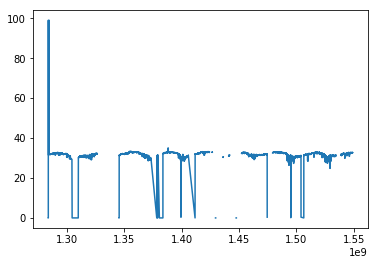

In [16]:
plt.plot(times, sals)

In [17]:
realtimes = np.array(times, dtype='datetime64[s]')

In [18]:
realtimes

array(['2010-09-07T15:17:01', '2010-09-07T18:17:01',
       '2010-09-07T18:47:00', ..., '2019-01-30T21:17:00',
       '2019-01-31T00:17:00', '2019-01-31T03:17:00'],
      dtype='datetime64[s]')

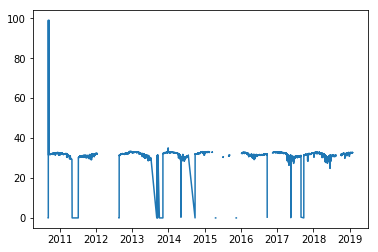

In [19]:
plt.plot(realtimes, sals)

In [20]:
#getting indices to do slicing
deplyIndices = np.where((realtimes > np.datetime64('2010-09-06')) &  (realtimes < np.datetime64('2011-05-04')))

In [21]:
# do the time slicing
dTimes = realtimes[deplyIndices]
dTimes.shape

(1896,)

In [22]:
#data slicing
dSST = sst[deplyIndices]
dSSS = sals[deplyIndices]
dSSS.shape

(1896,)

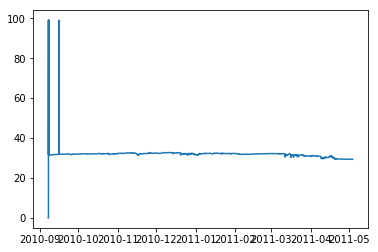

In [23]:
#plot sliced times/data
plt.plot(dTimes, dSSS)

In [24]:
def outlierDetector(timeArray, data, flags, minWindowN=4, windowInDays=1):
    if data.ndim != 1 or timeArray.ndim != 1 or flags.ndim != 1:
        raise ValueError("Inputs must be 1D")
    variances = np.zeros_like(data)
    
    if windowInDays != 'all':
        deltaTime = np.timedelta64(windowInDays, 'D')
    windowsN = np.zeros_like(data, dtype=np.int)
    means = np.zeros_like(data)
    numDevs = np.zeros_like(data)

    for indx,time in enumerate(timeArray):
        if (flags[indx] == 4) or (flags[indx] == 9):
            numDevs[indx] = np.nan
            continue

        if windowInDays == 'all':
            window = np.arange(timeArray.size)
        else:
            window = np.where((timeArray > time-deltaTime) &  (timeArray < time+deltaTime) &
                              (timeArray != time) & (flags != 4))[0]
        windowsN[indx] = window.size
        if windowsN[indx] < minWindowN:
            flags[indx] = 9
            numDevs[indx] = np.nan
            continue
        iQRange = iqr(data[window], nan_policy='omit')
        variances[indx] = (3/4) * iQRange
#         variances[indx] = np.nanvar(data[window])
        means[indx] = np.nanmean(data[window])
        numDevs[indx] = (data[indx] - means[indx])/np.sqrt(variances[indx])
    return numDevs, flags

In [37]:
def outlierRemoval(timeArray, data, windowInDays=1, minWindowN=4, numStdDevs=5, maxIterations=None, flags=None):
    # create the flags array
#     set_trace()
    if flags is None:
        flags = np.zeros_like(data, dtype=np.int) + 2
    
    # detect firs outlier
    print(np.where(flags != 2)[0].size)
    numDevs,flags = outlierDetector(timeArray, data, flags, minWindowN=minWindowN, windowInDays=windowInDays)
    cnt = 0
    if (maxIterations is None):
        maxIterations = data.size
    while ((np.nanmax(np.abs(numDevs)) > numStdDevs) and (cnt < maxIterations)):
        print(cnt)
        print(np.where(flags != 2)[0].size)
        flags[np.where(np.abs(numDevs) == np.nanmax(np.abs(numDevs)))] = 4

        numDevs,flags = outlierDetector(timeArray, data, flags, minWindowN=minWindowN, windowInDays=windowInDays)

        plt.plot(timeArray, numDevs)
        cnt += 1
    return flags, numDevs
    

0
0
0
1
5


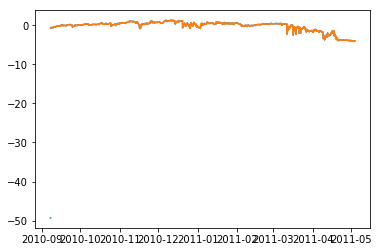

In [38]:
# global flagging
sssflags, sssNumDevs = outlierRemoval(dTimes, dSSS, windowInDays='all')

In [39]:
sssflags, sssNumDevs = outlierRemoval(dTimes, dSSS, windowInDays=1, flags=sssflags)


7


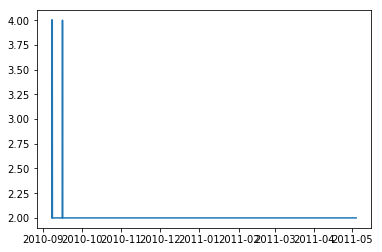

In [41]:

plt.plot(dTimes, sssflags)


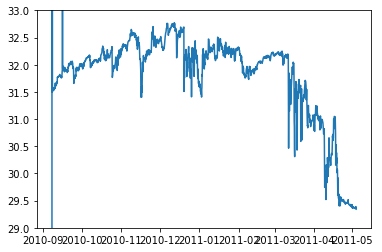

In [42]:
plt.ylim(29,33)
plt.plot(dTimes, dSSS)
plt.show()

In [29]:
print(dSSS[0:20])
print(sssflags[0:20])

[ 0.     0.    99.    31.516 99.    31.515 31.514 99.    31.502 31.503
 99.    31.561 31.59  31.557 31.551 31.518 31.55  31.53  31.532 31.541]
[4 4 4 2 4 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2]


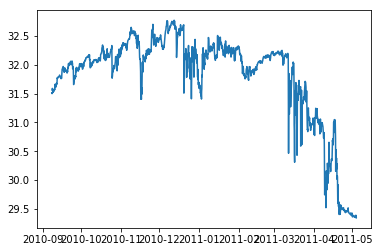

In [30]:
temp = np.copy(dSSS)
temp[np.where(sssflags!=2)] = np.nan
plt.plot(dTimes, temp)

In [31]:
print(sssflags[0:20])

[4 4 4 2 4 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2]


0
0
0
1
5
2
165
3
166
4
167
5
168
6
169
7
170
8
171
9
172


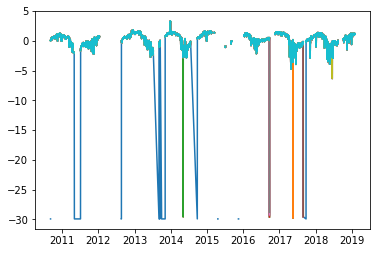

In [43]:
allsssflags, allsssNumDevs = outlierRemoval(realtimes, sals, 'all', maxIterations=None)

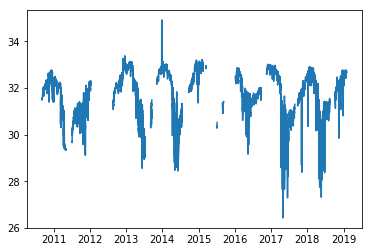

In [44]:
temp = np.copy(sals)
temp[np.where(allsssflags!=2)] = np.nan
plt.plot(realtimes, temp)

173


/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/Users/oz/Miniconda/miniconda3/envs/oceanatlas/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


0
173
1
175
2
177
3
178
4
179
5
180
6
181
7
182
8
183
9
184
10
185
11
186
12
187
13
188
14
189
15
190
16
191


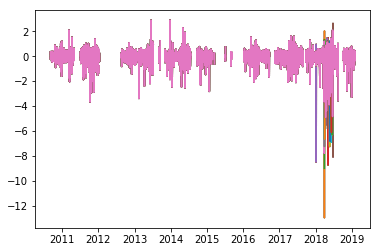

In [45]:
#this is the local spike detection on one day window on either side of data point
allsssflags, allsssNumDevs = outlierRemoval(realtimes, sals, windowInDays=1, flags=allsssflags)


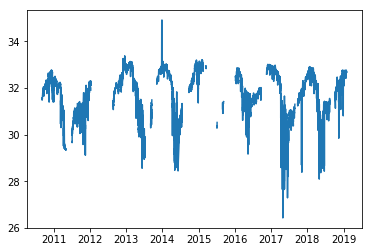

In [46]:
temp = np.copy(sals)
temp[np.where(allsssflags!=2)] = np.nan
plt.plot(realtimes, temp)

In [47]:
tIndices = np.where((realtimes > np.datetime64('2013-12-01')) &  (realtimes < np.datetime64('2013-12-31')))

In [48]:
print(tIndices[0].shape)

(232,)


In [49]:
print(sals[tIndices[0]])

[32.738 32.736 32.725 32.712 32.727 32.736 32.723 32.737 32.743 32.763
 32.765 32.765 32.767 32.766 32.74  32.729 32.74  32.763 32.74  32.733
 32.751 32.751 32.764 32.752 32.76  32.744 32.748 32.758 32.76  32.76
 32.772 32.761 32.761 32.76  32.763 32.766 32.77  32.761 32.763 32.764
 32.764 32.762 32.764 32.769 32.766 32.761 32.766 32.772 32.77  32.773
 32.755 32.749 32.765 32.766 32.761 32.761 32.769 32.774 32.78  32.782
 32.786 32.791 32.795 32.812 32.806 32.803 32.807 32.811 32.817 32.815
 32.824 32.828 32.828 32.823 32.825 32.828 32.838 32.827 32.825 32.845
 32.841 32.82  32.807 32.823 32.782 32.682 32.589 32.613 32.616 32.653
 32.658 32.708 32.737 32.699 32.758 32.761 32.748 32.769 32.787 32.799
 32.808 32.816 32.864 32.864 32.86  32.844 32.831 32.844 32.853 32.855
 32.865 32.865 32.91  32.907 32.908 32.913 32.914 32.913 32.915 32.817
 32.912 32.929 32.918 32.796 32.806 32.914 32.861 32.816 32.816 32.898
 32.916 32.83  32.923 32.789 32.786 32.757 32.754 32.75  32.768 32.797
 32.856

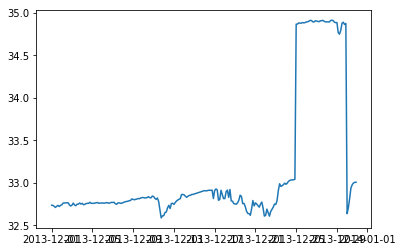

In [50]:
plt.plot(realtimes[tIndices[0]], temp[tIndices[0]])